# Binary Classififcation Using Logistic Regression Classifier
## Objective - To Accurately predict the Target =1 using logistic regression
#### Target  variable= 'target'
#### Classes  = 0 & 1
#### 0 = customer not likely to buy a new car
#### 1 = customer likely to buy a new car 

###### Data Dictionary:
ID: Unique ID of the customer
target: Model target. 1 if the customer has purchased more than 1 vehicle, 0 if they have only purchased 1.
age_band: Age banded into categories
gender: Male, Female or Missing
car_model: The model of vehicle, 18 models in total
car_segment: The type of vehicle
age_of_vehicle_years: Age of their last vehicle, in deciles
sched_serv_warr: Number of scheduled services (e.g. regular check-ups) used under warranty, in deciles
non_sched_serv_warr: Number of non-scheduled services (e.g. something broke out of the service cycle) used under warranty, in deciles
sched_serv_paid: Amount paid for scheduled services, in deciles
non_sched_serv_paid: Amount paid for non scheduled services, in deciles
total_paid_services: Amount paid in total for services, in deciles
total_services: Total number of services, in deciles
mth_since_last_serv: The number of months since the last service, in deciles
annualised_mileage: Annualised vehicle mileage, in deciles
num_dealers_visited: Number of different dealers visited for servicing, in deciles
num_serv_dealer_purchased: Number of services had at the same dealer where the vehicle was purchased, in deciles
### Project Steps:
##### 1. Loading and exploring data
##### 2. Preparing and cleaning data
##### 3. Splitting the data in Train (60%), Validation (20%) and Test (20%) sets
##### 4. Fitting the Logisic Regression Classifier
##### 5. Assess Baseline Performance
##### 6. Assess the performance metrics on Validation and Test sets


### 1. Loading and exploring data 

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix 
from sklearn.metrics import roc_auc_score, classification_report, roc_curve

In [2]:
# Saving the CSV file into DataFrame df
data = pd.read_csv('/Users/varunsinghchhetri/Downloads/repurchase_training.csv')
df = pd.DataFrame(data)

In [3]:
# Displaying the first five rows of df
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [4]:
# Displaying the descriptive statistics of the df
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
# displaying the summary (info) of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [6]:
# displaying the number of rows and columns of df
df.shape

(131337, 17)

In [7]:
# Checking for missing values in df
df.isnull().sum()

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

### 2. Preparing and Cleaning the data

In [8]:
# Checking the value counts of the classes of 0 and 1
df['Target'].value_counts()

0    127816
1      3521
Name: Target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

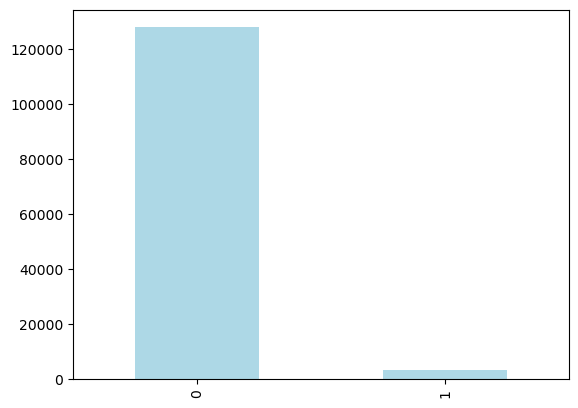

In [9]:
# Checking the value counts of the classes of 0 and 1
df['Target'].value_counts().plot(kind='bar', color='LightBlue')
plt.show

In [10]:
# Check for duplicates
duplicates = df.duplicated()

# Print number of duplicates
print(f"Number of duplicates: {duplicates.sum()}")

Number of duplicates: 0


In [11]:
# Dropping the 'ID' and 'age_band' columns as it is not required for in the process
df_copy = df.drop(['ID', 'age_band'], axis=1)

In [12]:
# Checking again for missing values
df_copy.isnull().sum()

Target                           0
gender                       69308
car_model                        0
car_segment                      0
age_of_vehicle_years             0
sched_serv_warr                  0
non_sched_serv_warr              0
sched_serv_paid                  0
non_sched_serv_paid              0
total_paid_services              0
total_services                   0
mth_since_last_serv              0
annualised_mileage               0
num_dealers_visited              0
num_serv_dealer_purchased        0
dtype: int64

In [13]:
# Checking for value counts in the gender column
df_copy['gender'].value_counts()

Male      36072
Female    25957
Name: gender, dtype: int64

In [14]:
# Replace missing values in a specific column with 'unknown'
df_copy['gender'] = df_copy['gender'].fillna('unknown')

In [15]:
# Confirming if there are any missing values still left in the dataset
df_copy.isnull().sum()

Target                       0
gender                       0
car_model                    0
car_segment                  0
age_of_vehicle_years         0
sched_serv_warr              0
non_sched_serv_warr          0
sched_serv_paid              0
non_sched_serv_paid          0
total_paid_services          0
total_services               0
mth_since_last_serv          0
annualised_mileage           0
num_dealers_visited          0
num_serv_dealer_purchased    0
dtype: int64

In [16]:
# Understanding the Categorical columns
df_copy[['car_model', 'car_segment','gender']]

,car_model,car_segment,gender
0,model_1,LCV,Male
1,model_2,Small/Medium,unknown
2,model_3,Large/SUV,Male
3,model_3,Large/SUV,unknown
4,model_2,Small/Medium,Female
...,...,...,...
131332,model_3,Large/SUV,unknown
131333,model_3,Large/SUV,unknown
131334,model_5,Large/SUV,unknown
131335,model_5,Large/SUV,unknown


In [17]:
# Performing One Hot Encoding
df_copy = pd.get_dummies(df_copy, columns=['car_model', 'car_segment','gender'])

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Target                     131337 non-null  int64
 1   age_of_vehicle_years       131337 non-null  int64
 2   sched_serv_warr            131337 non-null  int64
 3   non_sched_serv_warr        131337 non-null  int64
 4   sched_serv_paid            131337 non-null  int64
 5   non_sched_serv_paid        131337 non-null  int64
 6   total_paid_services        131337 non-null  int64
 7   total_services             131337 non-null  int64
 8   mth_since_last_serv        131337 non-null  int64
 9   annualised_mileage         131337 non-null  int64
 10  num_dealers_visited        131337 non-null  int64
 11  num_serv_dealer_purchased  131337 non-null  int64
 12  car_model_model_1          131337 non-null  uint8
 13  car_model_model_10         131337 non-null  uint8
 14  car_

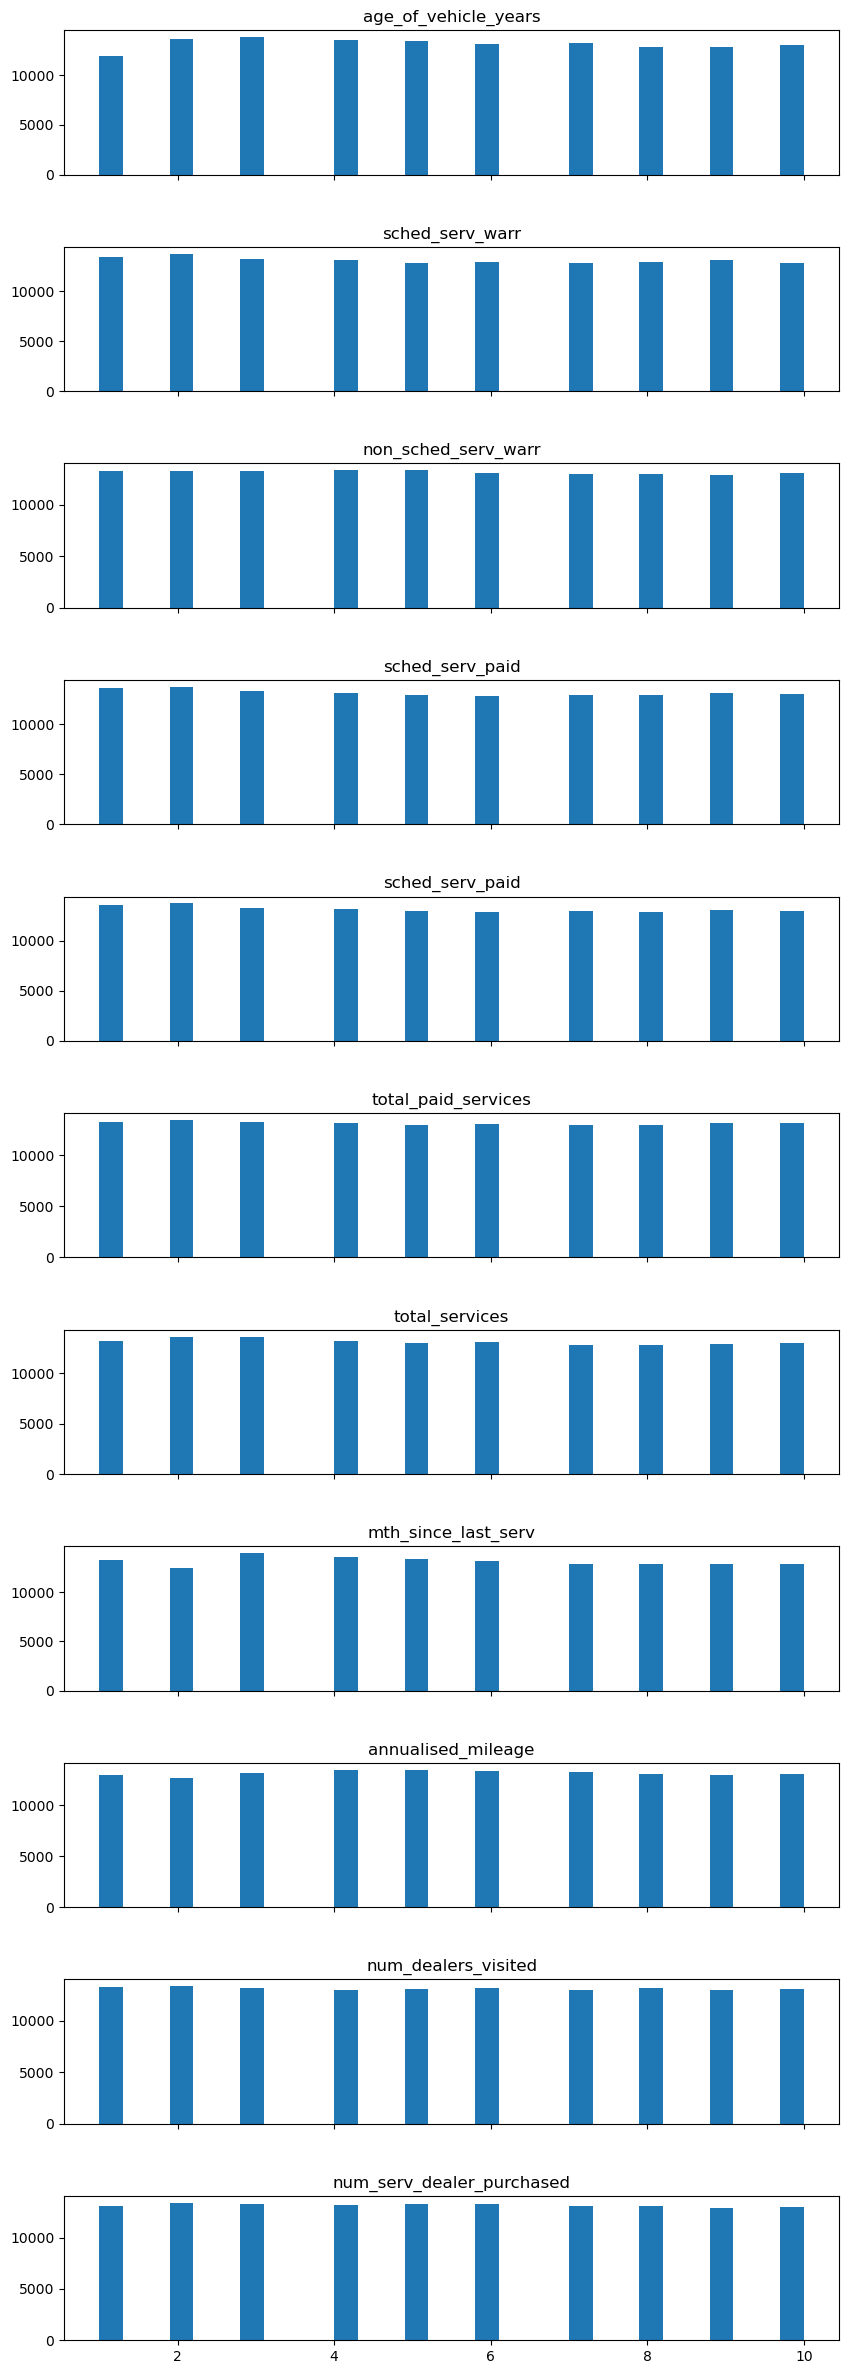

In [36]:
# Plotting histogram to check the distribution of columns

cols_to_check = ['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr', 'sched_serv_paid', 'sched_serv_paid', 'total_paid_services', 'total_services', 'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited', 'num_serv_dealer_purchased']

# Create subplots for each column
fig, axs = plt.subplots(nrows=len(cols_to_check), figsize=(10, 30), sharex=True)

# Plot histograms for each column
for i, col in enumerate(cols_to_check):
    axs[i].hist(df[col], bins=30)
    axs[i].set_title(col)

plt.subplots_adjust(hspace=0.5)
plt.show()

### 3. Splitting the dataset into Train (20%), Validation (20%) and Test (20%) sets

In [20]:
X = df_copy.drop('Target', axis=1) # features
y = df_copy['Target'] # target variable

# split into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 

# check the shape of the data
print('Train set:', X_train.shape, y_train.shape)
print('Validation set:', X_val.shape, y_val.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (78801, 37) (78801,)
Validation set: (26268, 37) (26268,)
Test set: (26268, 37) (26268,)


In [21]:
# Checking the distribution of classes in the train set 
y_train.value_counts()

0    76645
1     2156
Name: Target, dtype: int64

In [22]:
# Checking the distribution of classes in validation set
y_val.value_counts()

0    25563
1      705
Name: Target, dtype: int64

In [23]:
# Checking the distribution of classes in test set
y_test.value_counts()

0    25608
1      660
Name: Target, dtype: int64

### 4. Training the Logistic Regression Model


In [24]:
# Train logistic regression model on train set
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

### Assessing the Baseline Performance

In [37]:
# Assess baseline performance with majority class prediction
majority_class = y_train.mode()[0]
y_val_majority = [majority_class] * len(y_val)

print('Baseline performance:')
print(f'Accuracy: {acc_val_base:.6f}')


Baseline performance:
Accuracy: 0.973161


### 6. Assessing the Performance Metrics on the Validation Set 

In [26]:
# Predict on validation set and evaluate performance
y_val_pred = clf.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  clf.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.6f}')
print(f'Precision: {precision_val:.6f}')
print(f'Recall: {recall_val:.6f}')
print(f'F1 score: {f1_val:.6f}')
print(f'AUC-ROC score: {auc_roc_val:.6f}')

Validation set evaluation metrics:
Accuracy: 0.977730
Precision: 0.815789
Recall: 0.219858
F1 score: 0.346369
AUC-ROC score: 0.907380


In [27]:
# Create classification report for validation data
class_report = classification_report(y_val, y_val_pred)
print('\nClassification report:')
print(class_report)


Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25563
           1       0.82      0.22      0.35       705

    accuracy                           0.98     26268
   macro avg       0.90      0.61      0.67     26268
weighted avg       0.97      0.98      0.97     26268



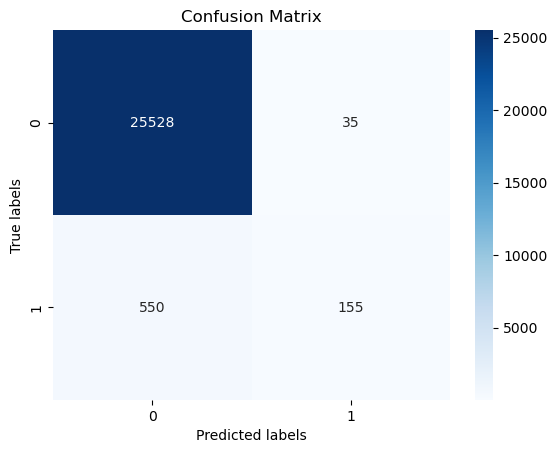

In [28]:
# Calculate confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)

# Create heatmap plot of confusion matrix
ax = plt.subplot()
sns.heatmap(cm_val, annot=True, ax=ax, cmap='Blues', fmt='g')

# Set plot labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show plot
plt.show()

### 6. Assessing the Performance Metrics on the Test Set

In [29]:
# Predict on test set and evaluate performance
y_test_pred = clf.predict(X_test)

# Calculate evaluation metrics on test data
acc_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_roc_test = roc_auc_score(y_test,  clf.predict_proba(X_test)[:,1])

# Print evaluation metrics on test data
print('\nTest set evaluation metrics:')
print(f'Accuracy: {acc_test:.6f}')
print(f'Precision: {precision_test:.6f}')
print(f'Recall: {recall_test:.6f}')
print(f'F1 score: {f1_test:.6f}')
print(f'AUC-ROC score: {auc_roc_test:.6f}')



Test set evaluation metrics:
Accuracy: 0.978757
Precision: 0.796512
Recall: 0.207576
F1 score: 0.329327
AUC-ROC score: 0.903527


In [30]:
# Create classification report for test data
class_report = classification_report(y_test, y_test_pred)
print('\nClassification report:')
print(class_report)


Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25608
           1       0.80      0.21      0.33       660

    accuracy                           0.98     26268
   macro avg       0.89      0.60      0.66     26268
weighted avg       0.98      0.98      0.97     26268



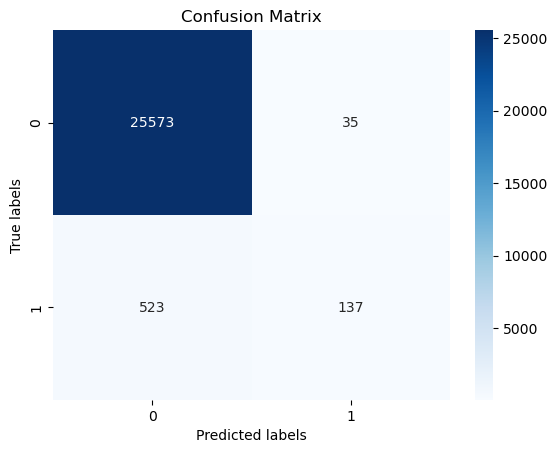

In [31]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create heatmap plot of confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

# Set plot labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show plot
plt.show()

In [32]:
# Get predicted probabilities for validation and test sets
y_val_proba = clf.predict_proba(X_val)[:, 1]
y_test_proba = clf.predict_proba(X_test)[:, 1]

In [33]:
# Calculate AUC score for validation and test sets
val_auc = roc_auc_score(y_val, y_val_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

In [34]:
# Generate ROC curves for validation and test sets
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

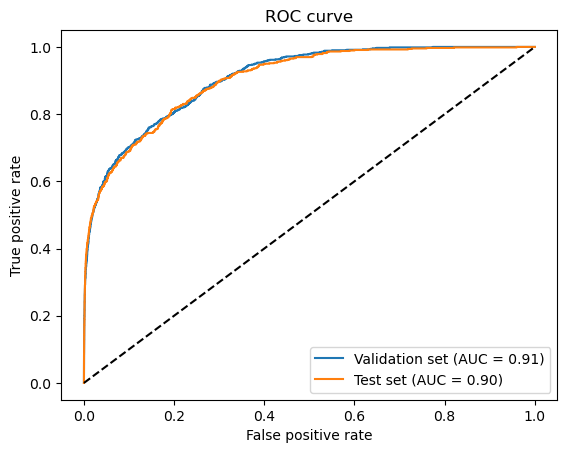

In [35]:
# Plot ROC curves
plt.plot(fpr_val, tpr_val, label='Validation set (AUC = {:.2f})'.format(val_auc))
plt.plot(fpr_test, tpr_test, label='Test set (AUC = {:.2f})'.format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()